# Exploring Our Data - Lab

## Introduction 

In this lab we shall perform a exploratory data analysis task, using statistical and visual EDA skills we have seen so far. We shall continue using the Walmart sales database that we have acquired and cleaned in the previous labs. 

## Objectives
You will be able to:

* Check the distribution of various columns
* Examine the descriptive statistics of our data set
* Create visualizations to help us better understand our data set

## Data Exploration

In the previous lab, we performed some data cleansing and scrubbing activities to create data subset, deal with null values and categorical variables etc. In this lab, we shall perform basic data exploration to help us better understand the distributions of our variables. We shall consider regression assumptions seen earlier to help us during the modeling process. 

*The dataset for this lab has been taken from our data scrubbing lab, just before we encoded our categorical variables as one hot. This is to keep the number of columns same as original dataset to allow more convenience during exploration.* 

### Load the dataset 'walmart_dataset.csv' as pandas dataframe and check its contents 

In [1]:
# You code here 
!ls

CONTRIBUTING.md  index.ipynb  README.md
index_files	 LICENSE.md   walmart_dataset.csv


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('walmart_dataset.csv')
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,binned_markdown_1,binned_markdown_2,binned_markdown_3,binned_markdown_4,binned_markdown_5
0,1,1,24924.50,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN
1,1,2,50605.27,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN
2,1,3,13740.12,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN
3,1,4,39954.04,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN
4,1,5,32229.38,False,A,0.283436,-1.301205,-1.56024,0.40349,0.913194,NaN,NaN,NaN,NaN,NaN


In [4]:
df.IsHoliday.dtype

dtype('bool')

In [5]:
df.IsHoliday = df.IsHoliday.astype(int).value_counts()

### Describe the dataset using 5 point statistics and record your observations

In [6]:
# your code here 
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
count,97839.000000,97839.000000,97839.000000,2.000000,9.783900e+04,9.783900e+04,9.783900e+04,9.783900e+04,9.783900e+04
mean,5.474545,43.318861,17223.235591,48919.500000,1.092260e-16,2.442107e-13,4.830299e-13,-1.535671e-14,1.793500e-12
std,2.892364,29.673645,25288.572553,59421.718357,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,1.000000,-1098.000000,6902.000000,-1.611999e+00,-3.843452e+00,-1.691961e+00,-1.958762e+00,-2.776898e+00
25%,3.000000,19.000000,2336.485000,27910.750000,-1.028620e+00,-7.087592e-01,-1.053793e+00,-1.266966e-01,-6.503157e-01
50%,6.000000,36.000000,7658.280000,48919.500000,2.834360e-01,1.340726e-01,1.180741e-01,4.995210e-01,-4.621274e-02
75%,8.000000,71.000000,20851.275000,69928.250000,1.113495e+00,8.680410e-01,8.243739e-01,6.346144e-01,7.089160e-01
max,10.000000,99.000000,693099.360000,90937.000000,1.171380e+00,1.738375e+00,2.745691e+00,8.517705e-01,2.361469e+00


In [7]:
# Your observations here 

# .    Somebody lost a thousand bucks during one week

### Use pandas histogram plotting to plot histograms for all the variables in the dataset

In [8]:
# Your code here 
numerics = df.describe().columns
df_numeric = df[numerics]
df_numeric.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,24924.50,90937.0,0.283436,-1.301205,-1.56024,0.40349,0.913194
1,1,2,50605.27,6902.0,0.283436,-1.301205,-1.56024,0.40349,0.913194
2,1,3,13740.12,NaN,0.283436,-1.301205,-1.56024,0.40349,0.913194
3,1,4,39954.04,NaN,0.283436,-1.301205,-1.56024,0.40349,0.913194
4,1,5,32229.38,NaN,0.283436,-1.301205,-1.56024,0.40349,0.913194


In [9]:
# df_numeric.hist(figsize = (16,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73f803a0f0>,
      dtype=object)

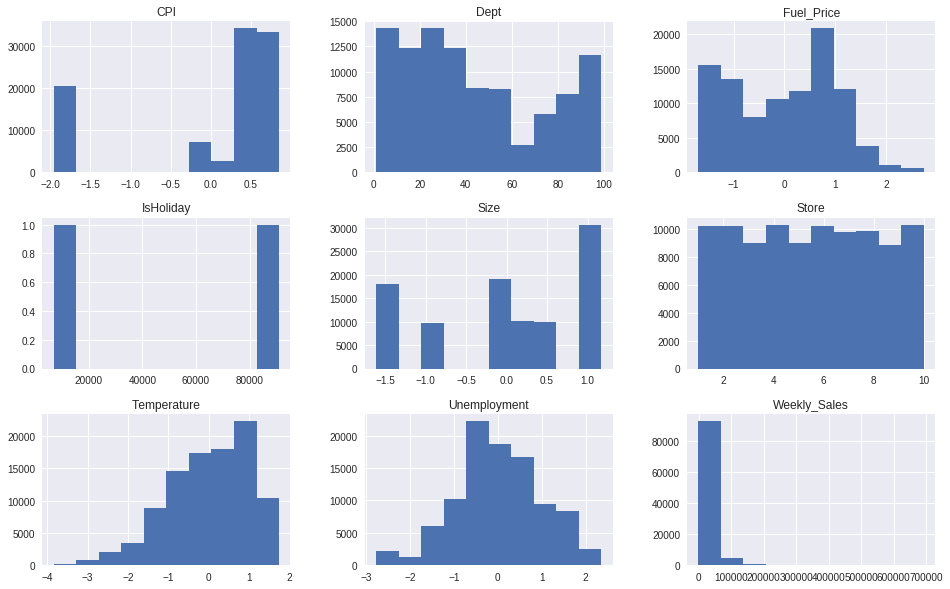

In [10]:
df.hist(figsize=(16,10))

In [11]:
# Your observations here 

### Build normalized histograms with kde plots to explore the distributions further. 
### Use only the continuous variables in the dataset to plot these visualizations. 

In [13]:
for col in df_numeric:
    print(col)
#     print(type(col))
for col in df_numeric.columns:
    print(col)
#     print(type(col))

Store
Dept
Weekly_Sales
IsHoliday
Size
Temperature
Fuel_Price
CPI
Unemployment
Store
Dept
Weekly_Sales
IsHoliday
Size
Temperature
Fuel_Price
CPI
Unemployment


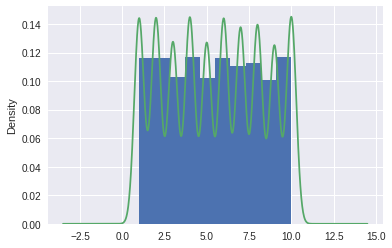

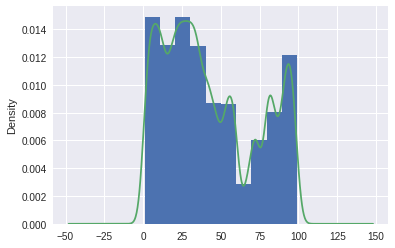

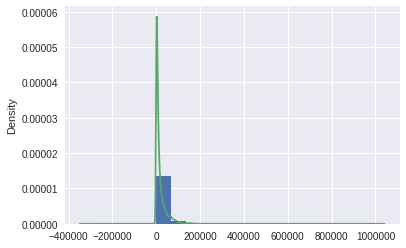

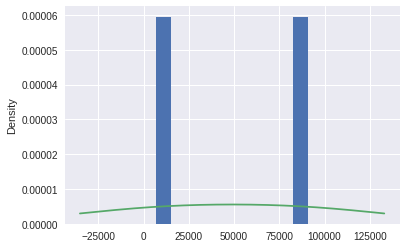

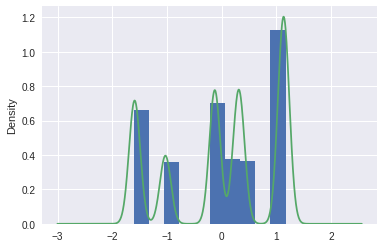

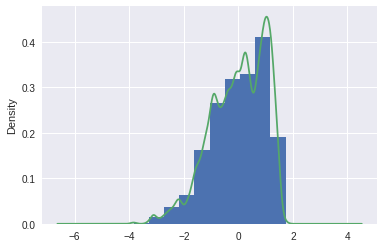

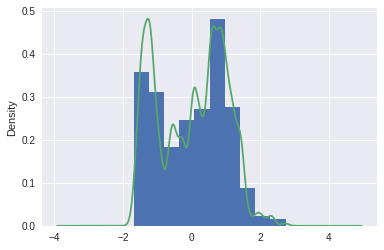

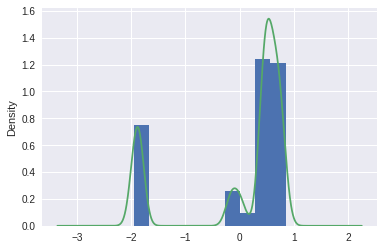

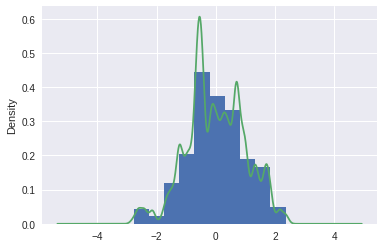

In [15]:
for col in df_numeric.columns:
    plt.figure()
    df[col].hist(density=True)
    df[col].plot.kde()
    plt.show
    

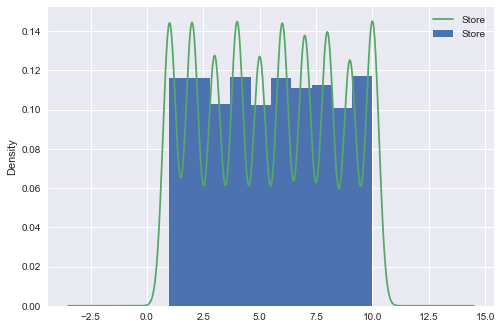

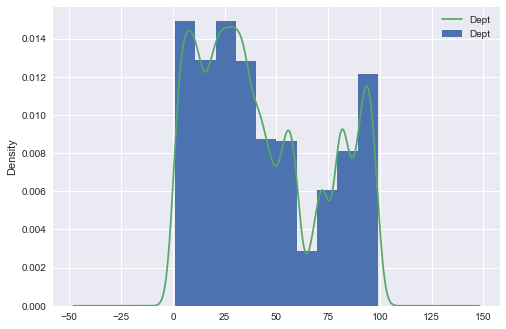

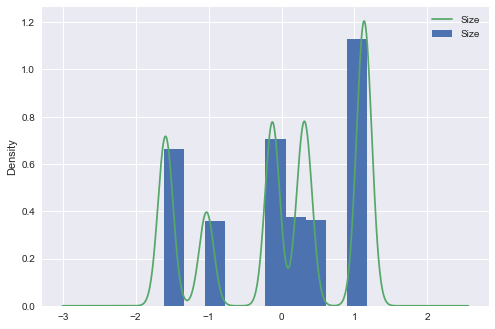

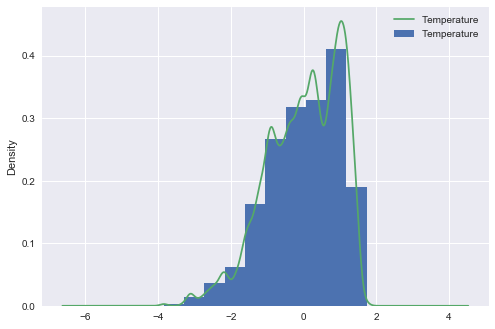

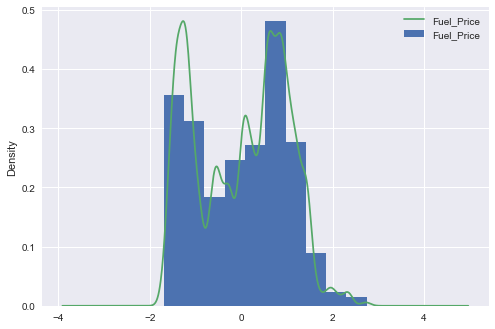

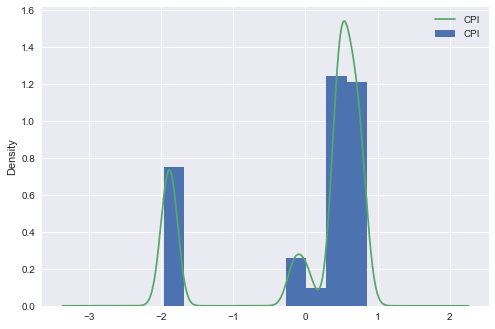

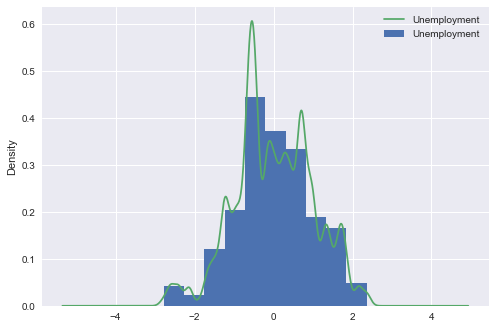

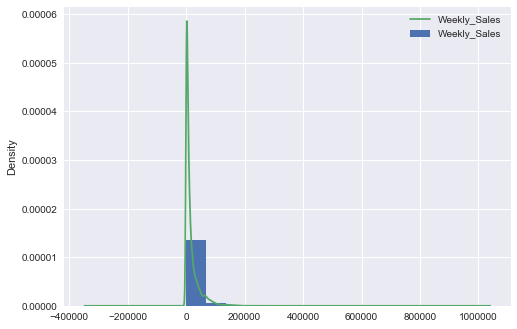

In [73]:
# Your code here 

In [ ]:
# State your observations here 

### Build joint plots to check for the linearity assumption between predictors and target variable

Let's use a slightly more advanced plotting technique in seaborn that uses scatter plots, distributions, kde and simple regression line - all in a single go. Its called a `jointplot`. [Here is the official doc. for this method](https://seaborn.pydata.org/generated/seaborn.jointplot.html). 

Here is how you would use it:

> **`sns.jointplot(x= <column>, y= <column>, data=<dataset>, kind='reg')`**

A joint plot will allow us to visually inspect linearity as well as normality assumptions as a single step. 

In [19]:
trimmed_cols = [col for col in df_numeric if col not in ['Weekly_Sales', 'IsHoliday']]
trimmed_cols

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


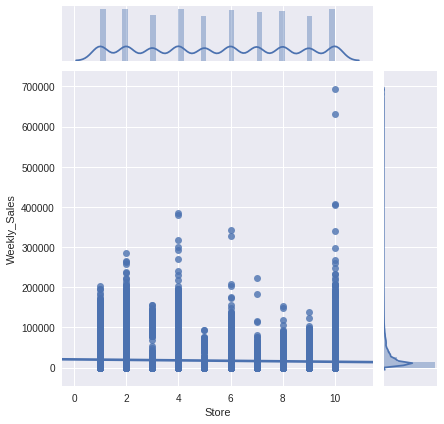

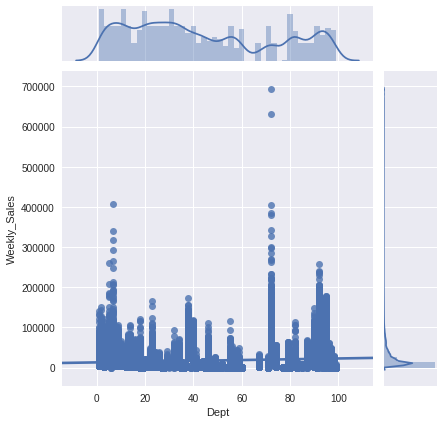

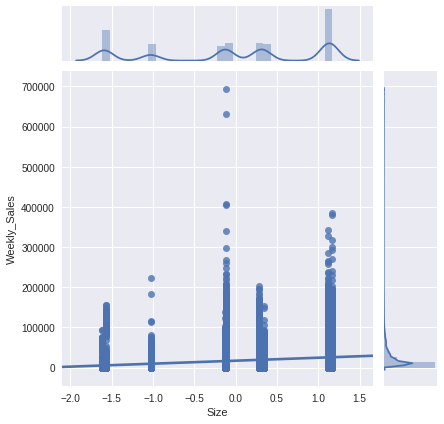

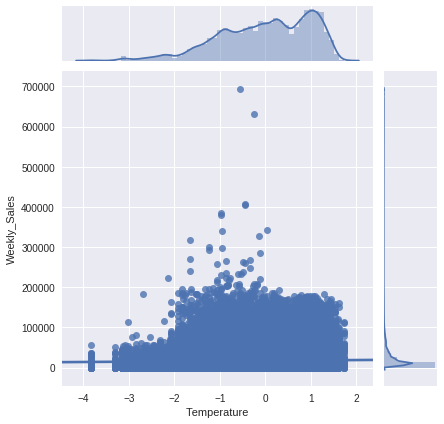

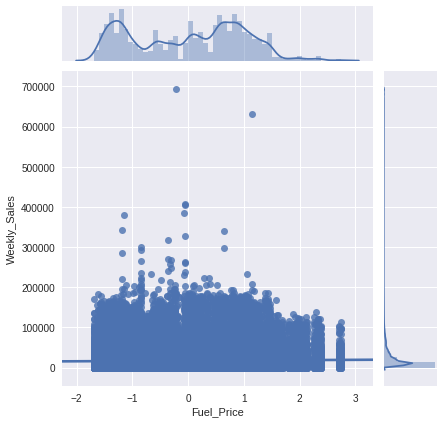

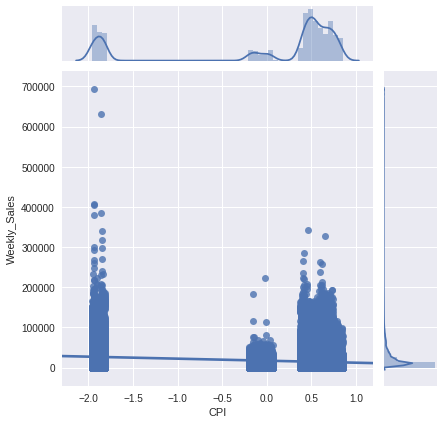

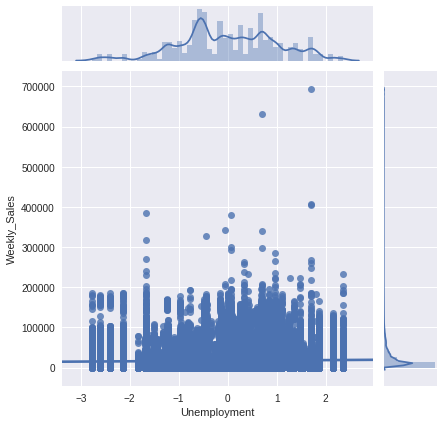

In [22]:
for col in ['Store', 'Dept', 'Size',
            'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    sns.jointplot(x= col, y= 'Weekly_Sales', data=df, kind='reg')

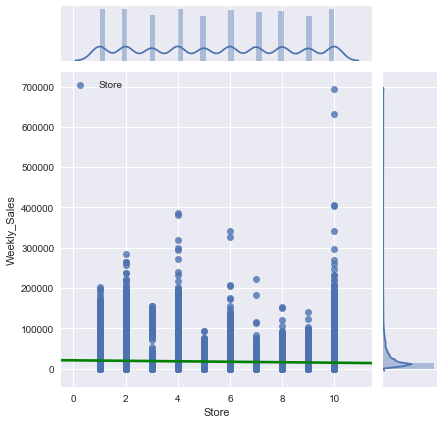

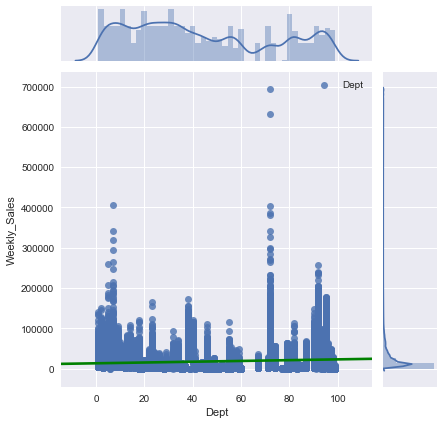

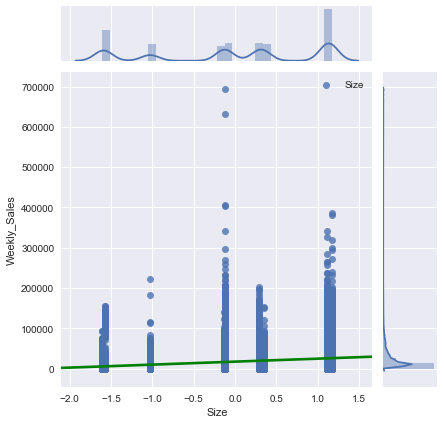

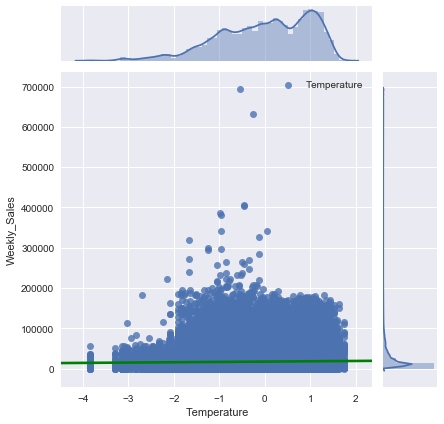

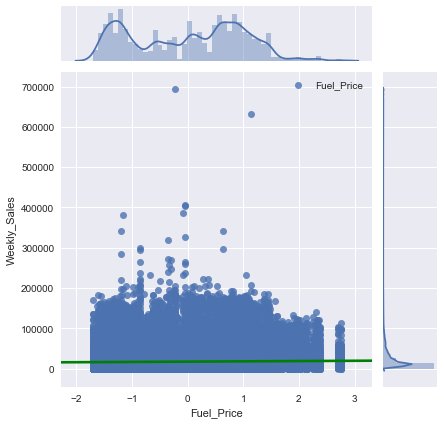

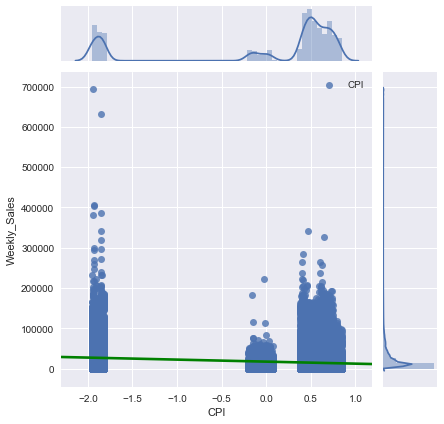

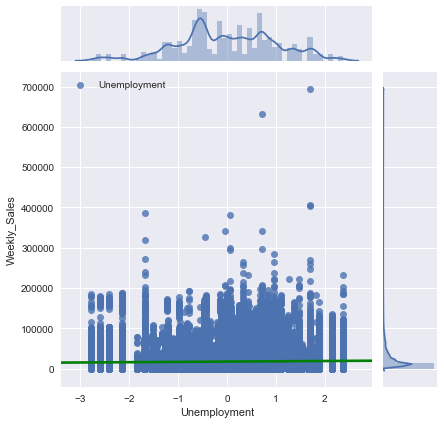

In [76]:
# Your code here 

In [77]:
# Provide your observations here 

### So Now what ?

Okie so our key assumptions at this stage don't hold so strong. But that does not mean that should give up and call it a poor dataset. There are lot of pre-processing techniques we can still apply to further clean the data and make it more suitable for modeling. 

![](https://i.stack.imgur.com/yZQgZ.gif)

For building our initial model, we shall use this dataset for a multiple regression experiment and after inspecting the combined effect of all the predictors on the target, we may want to further pre-process the data and take it in for another analytical ride. 

The key takeaway here is that we will hardly come across with a real world dataset that meets all our expectations. Another reason to move ahead with this dataset is to ehelp us realize the importance of pre-processing for an improved model building. and we must always remember: 

> Model development is an iterative process. It hardly ever gets done in the first attempt. 

So looking at above, we shall look at some guidelines on model building and validation in upcoming lessons, before we move on to our regression experiment. 

## Further reading 

Have a look at following resources on how to deal with complex datasets that don't meet our initial expectations. 

[What to Do When Bad Data Thwarts Machine Learning Success](https://towardsdatascience.com/what-to-do-when-bad-data-thwarts-machine-learning-success-fb82249aae8b)

[Practical advice for analysis of large, complex data sets ](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)

[Data Cleaning Challenge: Scale and Normalize Data](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)

## Summary 

In this lesson we performed some basic EDA on the walmart dataset to check for regression assumptions. Initially our assumptions dont hold very strong but we decided to move ahead with building our first model using this dataset and plan further pre-processing in following iterations. 